# **Dzaky Raihan Ahmad**
# **1301204316**
Buatlah visualisasi geospatial yang menunjukkan sebaran kasus positif COVID19 di Indonesia per tanggal 1 Mei 2021 dengan basis provinsi.

In [1]:
!pip install geopandas
!pip install geoplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 84.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 55.9 MB/s eta 0:00:00


In [2]:
import geoplot as gplt
import geopandas as gpd
from geopandas import GeoDataFrame
import geoplot.crs as gcrs
from datetime import datetime
import imageio
import pandas as pd
import pathlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

from IPython.display import Image

In [11]:
peta = gpd.read_file("INDONESIA_PROP.shp")
peta.head()

,ID,kode,Propinsi,SUMBER,geometry
0,1,85,IRIAN JAYA TIMUR,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((137.16585 -3.17501 0.00000, ..."
1,2,52,NUSATENGGARA BARAT,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((117.62720 -8.50640 0.00000, ..."
2,3,75,GORONTALO,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((122.18814 1.04530 0.00000, 1..."
3,4,74,SULAWESI TENGGARA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((120.98423 -2.83534 0.00000, ..."
4,5,34,DAERAH ISTIMEWA YOGYAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"POLYGON Z ((110.01183 -7.88690 0.00000, 110.01..."


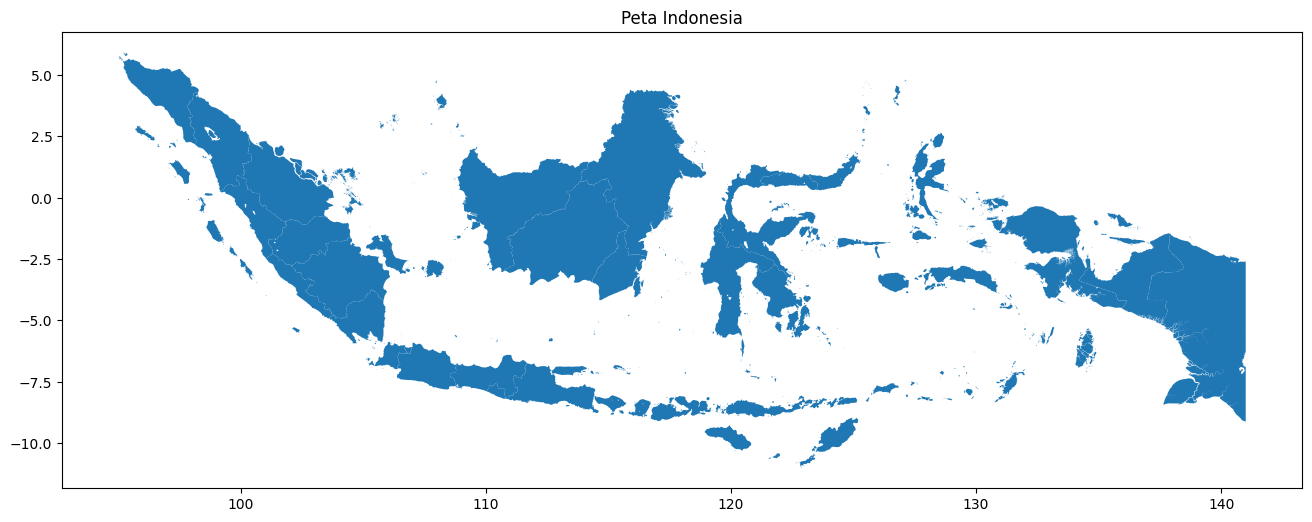

In [12]:
peta.plot(figsize = (16,18))
plt.title('Peta Indonesia')
plt.show()

# DATASET

In [77]:
df = pd.read_csv("covid_19_indonesia_time_series_all.csv")
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0,1.0


In [78]:
df_new = ['Date','Location','New Cases','New Deaths','New Recovered','New Active Cases','Total Cases','Total Deaths','Total Recovered','Total Active Cases']
df_covid = df[df_new]
df_covid = df_covid.apply(lambda x : x.astype(str).str.upper())
df_covid.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
0,3/1/2020,DKI JAKARTA,2,0,0,2,39,20,41,-22
1,3/2/2020,DKI JAKARTA,2,0,0,2,41,20,41,-20
2,3/2/2020,INDONESIA,2,0,0,2,2,0,0,2
3,3/2/2020,RIAU,1,0,0,1,2,0,3,-1
4,3/3/2020,DKI JAKARTA,2,0,0,2,43,20,41,-18


In [79]:
numbercases = df_covid.loc[:,"New Cases":"Total Active Cases"].astype(int)
time = pd.DataFrame(df_covid.loc[:,'Date'].apply(pd.to_datetime))
location = pd.DataFrame(df_covid.loc[:,'Location'].astype(str))

In [80]:
df_covid_new = pd.concat ([time.reset_index(drop=True), location.reset_index(drop=True), numbercases.reset_index(drop=True)],axis=1)
df_covid_new

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
0,2020-03-01,DKI JAKARTA,2,0,0,2,39,20,41,-22
1,2020-03-02,DKI JAKARTA,2,0,0,2,41,20,41,-20
2,2020-03-02,INDONESIA,2,0,0,2,2,0,0,2
3,2020-03-02,RIAU,1,0,0,1,2,0,3,-1
4,2020-03-03,DKI JAKARTA,2,0,0,2,43,20,41,-18
...,...,...,...,...,...,...,...,...,...,...
21754,2021-12-02,SULAWESI UTARA,2,0,0,2,34715,1056,33566,93
21755,2021-12-02,SUMATERA BARAT,4,0,0,4,89849,2152,87605,92
21756,2021-12-02,SUMATERA SELATAN,4,0,0,4,59937,3071,56830,36
21757,2021-12-02,SUMATERA UTARA,4,0,1,3,106045,2889,103061,95


In [81]:
df_covid_mergered = df_covid_new.merge(peta, how='inner', left_on=['Location'], right_on=['Propinsi'])
df_covid_mergered.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,ID,kode,Propinsi,SUMBER,geometry
0,2020-03-01,DKI JAKARTA,2,0,0,2,39,20,41,-22,14,31,DKI JAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((106.68148 -6.13549 0.00000, ..."
1,2020-03-02,DKI JAKARTA,2,0,0,2,41,20,41,-20,14,31,DKI JAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((106.68148 -6.13549 0.00000, ..."
2,2020-03-03,DKI JAKARTA,2,0,0,2,43,20,41,-18,14,31,DKI JAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((106.68148 -6.13549 0.00000, ..."
3,2020-03-04,DKI JAKARTA,2,0,0,2,45,20,41,-16,14,31,DKI JAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((106.68148 -6.13549 0.00000, ..."
4,2020-03-05,DKI JAKARTA,0,1,0,-1,45,21,41,-17,14,31,DKI JAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((106.68148 -6.13549 0.00000, ..."


# VISUALISASI

In [82]:
#Memfilter tanggal 1 Mei 2021
df_new = df_covid_new.loc[df_covid_new['Date']=='2021-05-01']
df_new.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases
14218,2021-05-01,ACEH,124,2,118,4,11169,441,9727,1001
14219,2021-05-01,BALI,142,10,165,-33,44813,1346,42135,1332
14220,2021-05-01,BANTEN,53,0,28,25,47396,1210,44202,1984
14221,2021-05-01,BENGKULU,102,0,40,62,6884,172,5885,827
14222,2021-05-01,DKI JAKARTA,926,15,793,118,409540,6681,395727,7132


In [83]:
df_covid_final = df_new.merge(peta, how='inner', left_on=['Location'], right_on=['Propinsi'])
df_covid_final.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,ID,kode,Propinsi,SUMBER,geometry
0,2021-05-01,BALI,142,10,165,-33,44813,1346,42135,1332,18,51,BALI,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((115.19494 -8.73232 0.00000, ..."
1,2021-05-01,BENGKULU,102,0,40,62,6884,172,5885,827,31,17,BENGKULU,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((103.46781 -4.35304 0.00000, ..."
2,2021-05-01,DKI JAKARTA,926,15,793,118,409540,6681,395727,7132,14,31,DKI JAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((106.68148 -6.13549 0.00000, ..."
3,2021-05-01,DAERAH ISTIMEWA YOGYAKARTA,128,4,330,-206,39644,960,34735,3949,5,34,DAERAH ISTIMEWA YOGYAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"POLYGON Z ((110.01183 -7.88690 0.00000, 110.01..."
4,2021-05-01,GORONTALO,6,4,49,-47,5400,165,5082,153,3,75,GORONTALO,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((122.18814 1.04530 0.00000, 1..."


Text(0.5, 1.0, 'Sebaran Kasus Positif COVID19 (Total Cases) 1 Mei 2021')

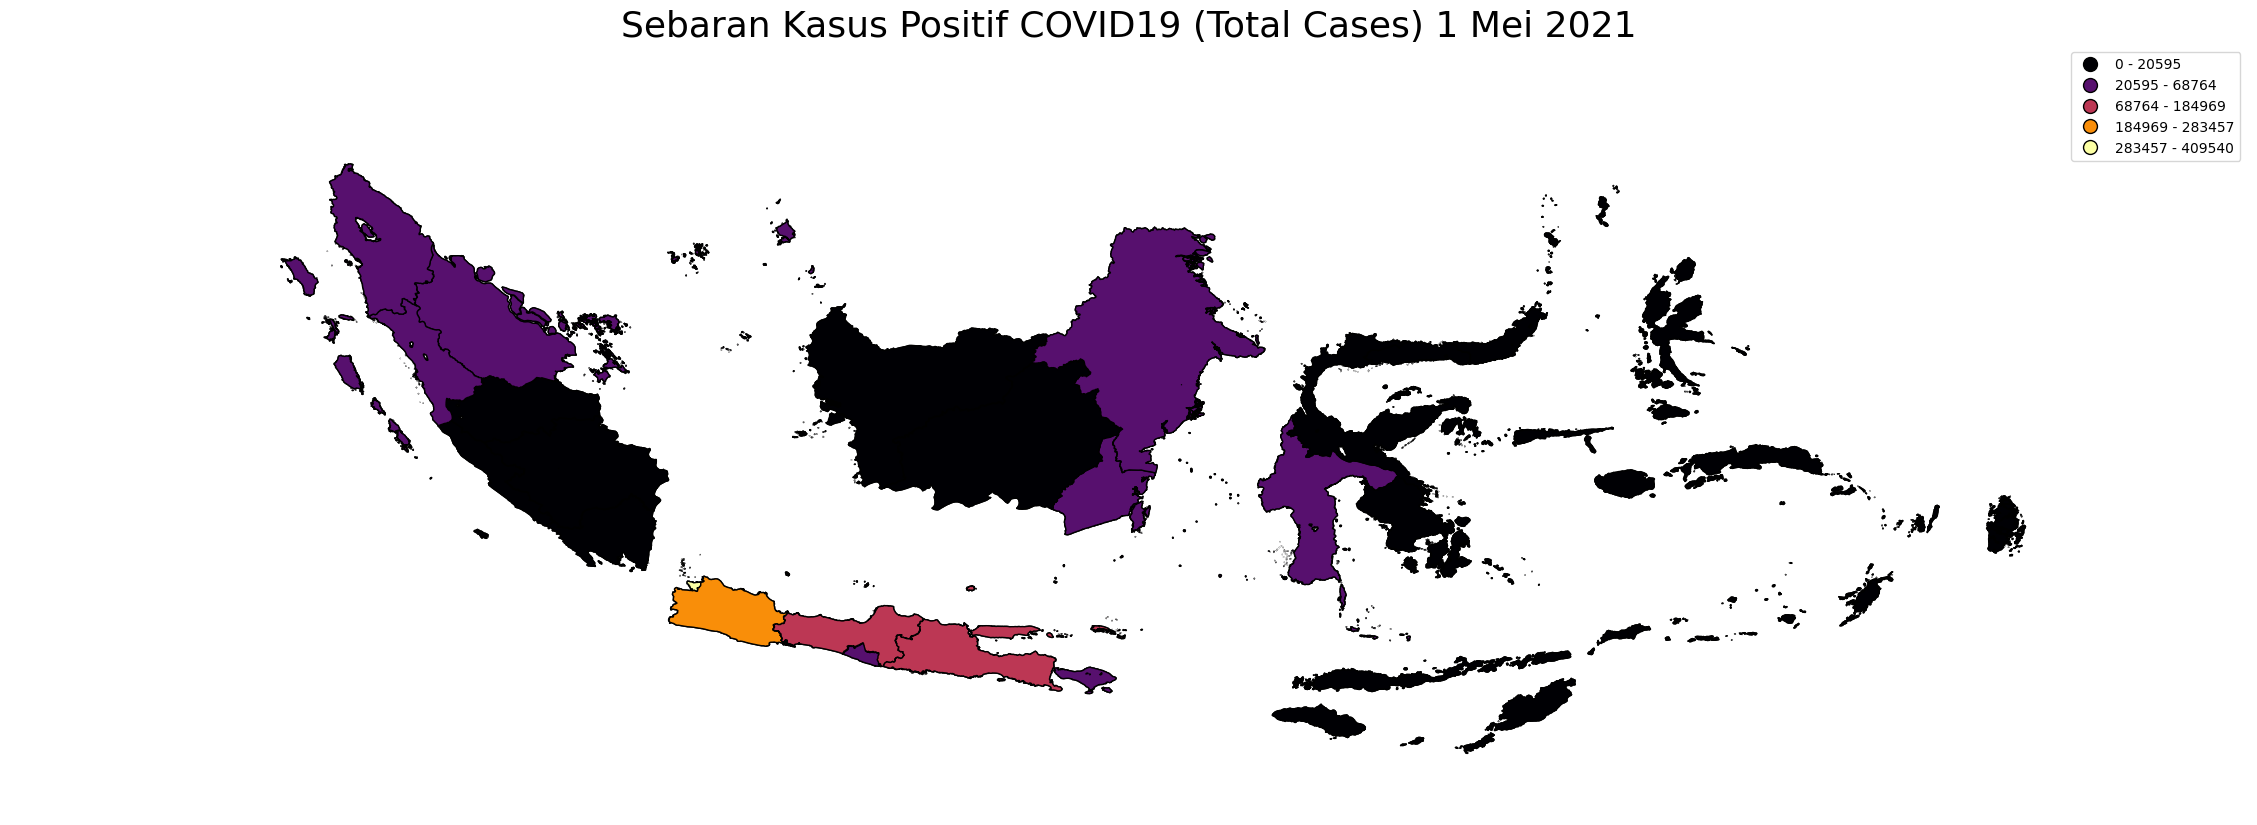

In [84]:
#Visualisasi dari "Total Cases"
df_covid_final = GeoDataFrame(df_covid_final)
ax = gplt.polyplot(
    df_covid_final,
    facecolor="lightgray",
    figsize=(30, 10),
    projection=gcrs.AlbersEqualArea()
)

gplt.choropleth(
    df_covid_final,
    hue="Total Cases",
    edgecolor="black",
    linewidth=1,
    cmap="inferno",
    legend=True,
    scheme="FisherJenks",
    projection=gcrs.AlbersEqualArea(),
    ax=ax
)

ax.set_title(
    'Sebaran Kasus Positif COVID19 (Total Cases) 1 Mei 2021',
    fontsize=26
)

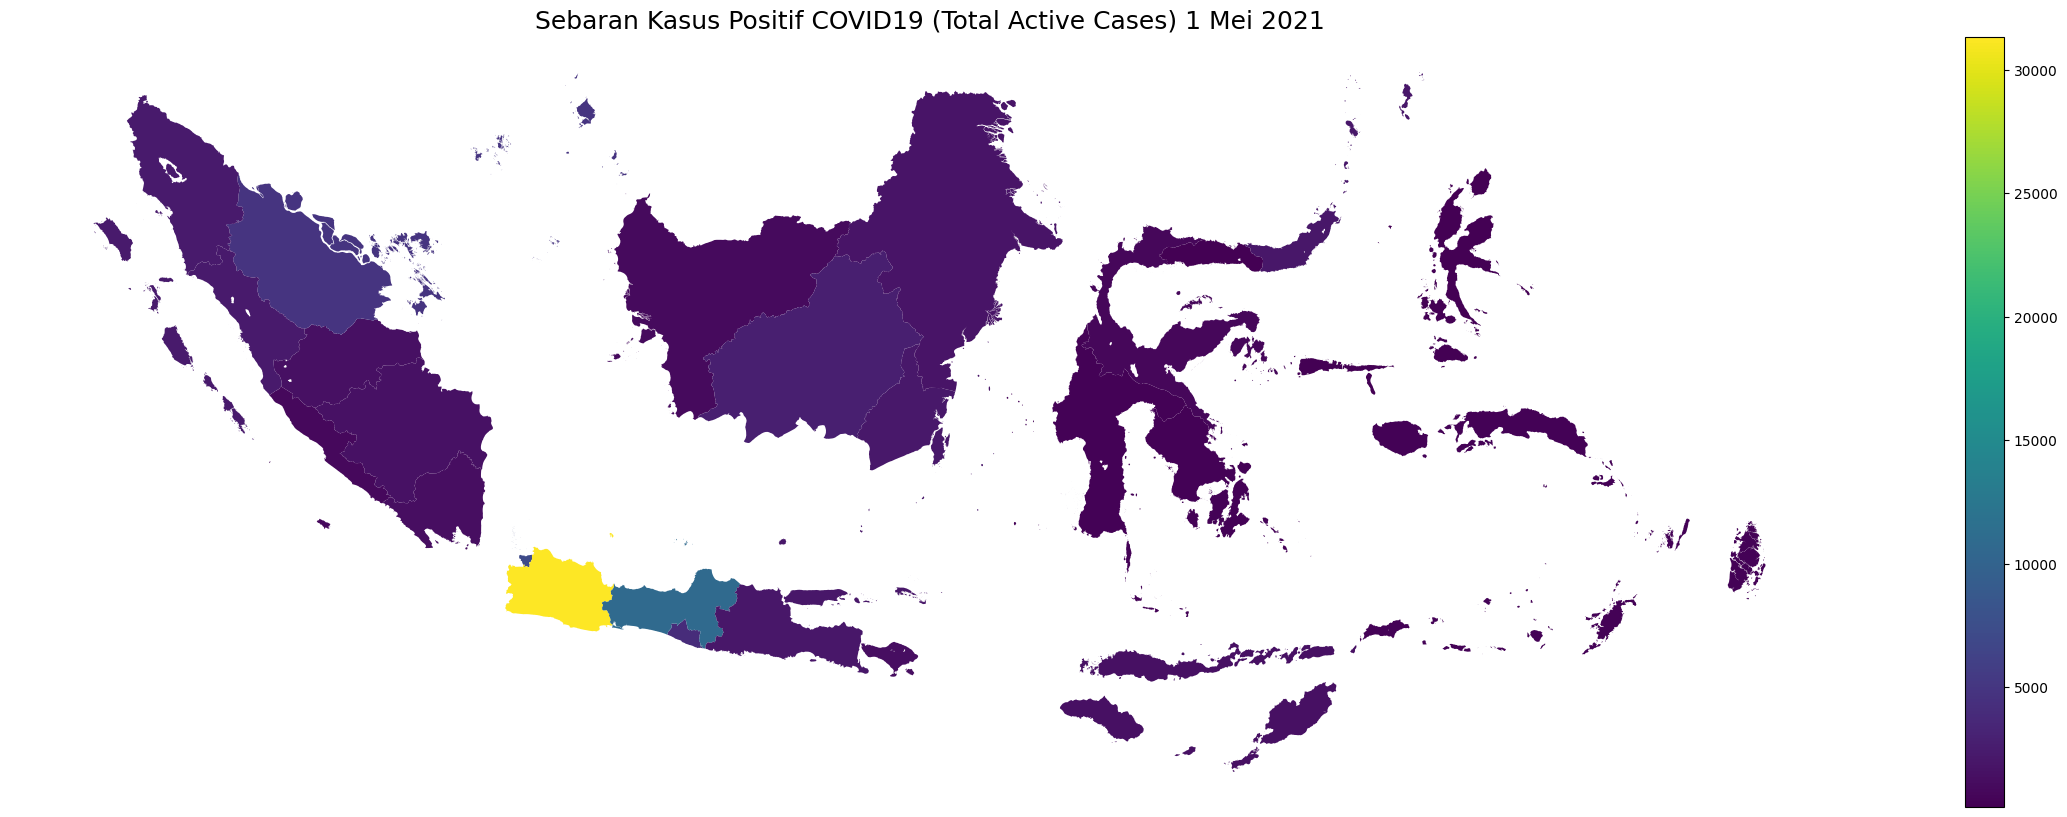

In [85]:
#Visualisasi dari "Total Active Case"
df_covid_final.plot(column='Total Active Cases', cmap="viridis", legend=True, figsize = (30,10))
plt.axis('off')
plt.title('Sebaran Kasus Positif COVID19 (Total Active Cases) 1 Mei 2021', fontsize=18)
plt.show()

# VISUALISASI MEI-DESEMBER 2021

In [86]:
df_covid_mergered["Date"] = pd.to_datetime(df_covid_mergered["Date"])
df_covid_mergered['YearMonth'] = df_covid_mergered['Date'].apply(lambda x:x.strftime('%Y/%m'))

df_covid_mergered= df_covid_mergered.groupby(["Location","YearMonth"]).sum().reset_index()
covid19_ind = df_covid_mergered.merge(peta, how='inner', left_on=['Location'], right_on=['Propinsi'])


<ipython-input-86-2dbe9a9255bd>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_covid_mergered= df_covid_mergered.groupby(["Location","YearMonth"]).sum().reset_index()


In [87]:
date_set = covid19_ind.YearMonth.drop_duplicates()
date_set.sort_values(ascending=True, inplace=True)

#Memilih bulan Mei - Desember
date_set = date_set[14:22]
date_set

14    2021/05
15    2021/06
16    2021/07
17    2021/08
18    2021/09
19    2021/10
20    2021/11
21    2021/12
Name: YearMonth, dtype: object

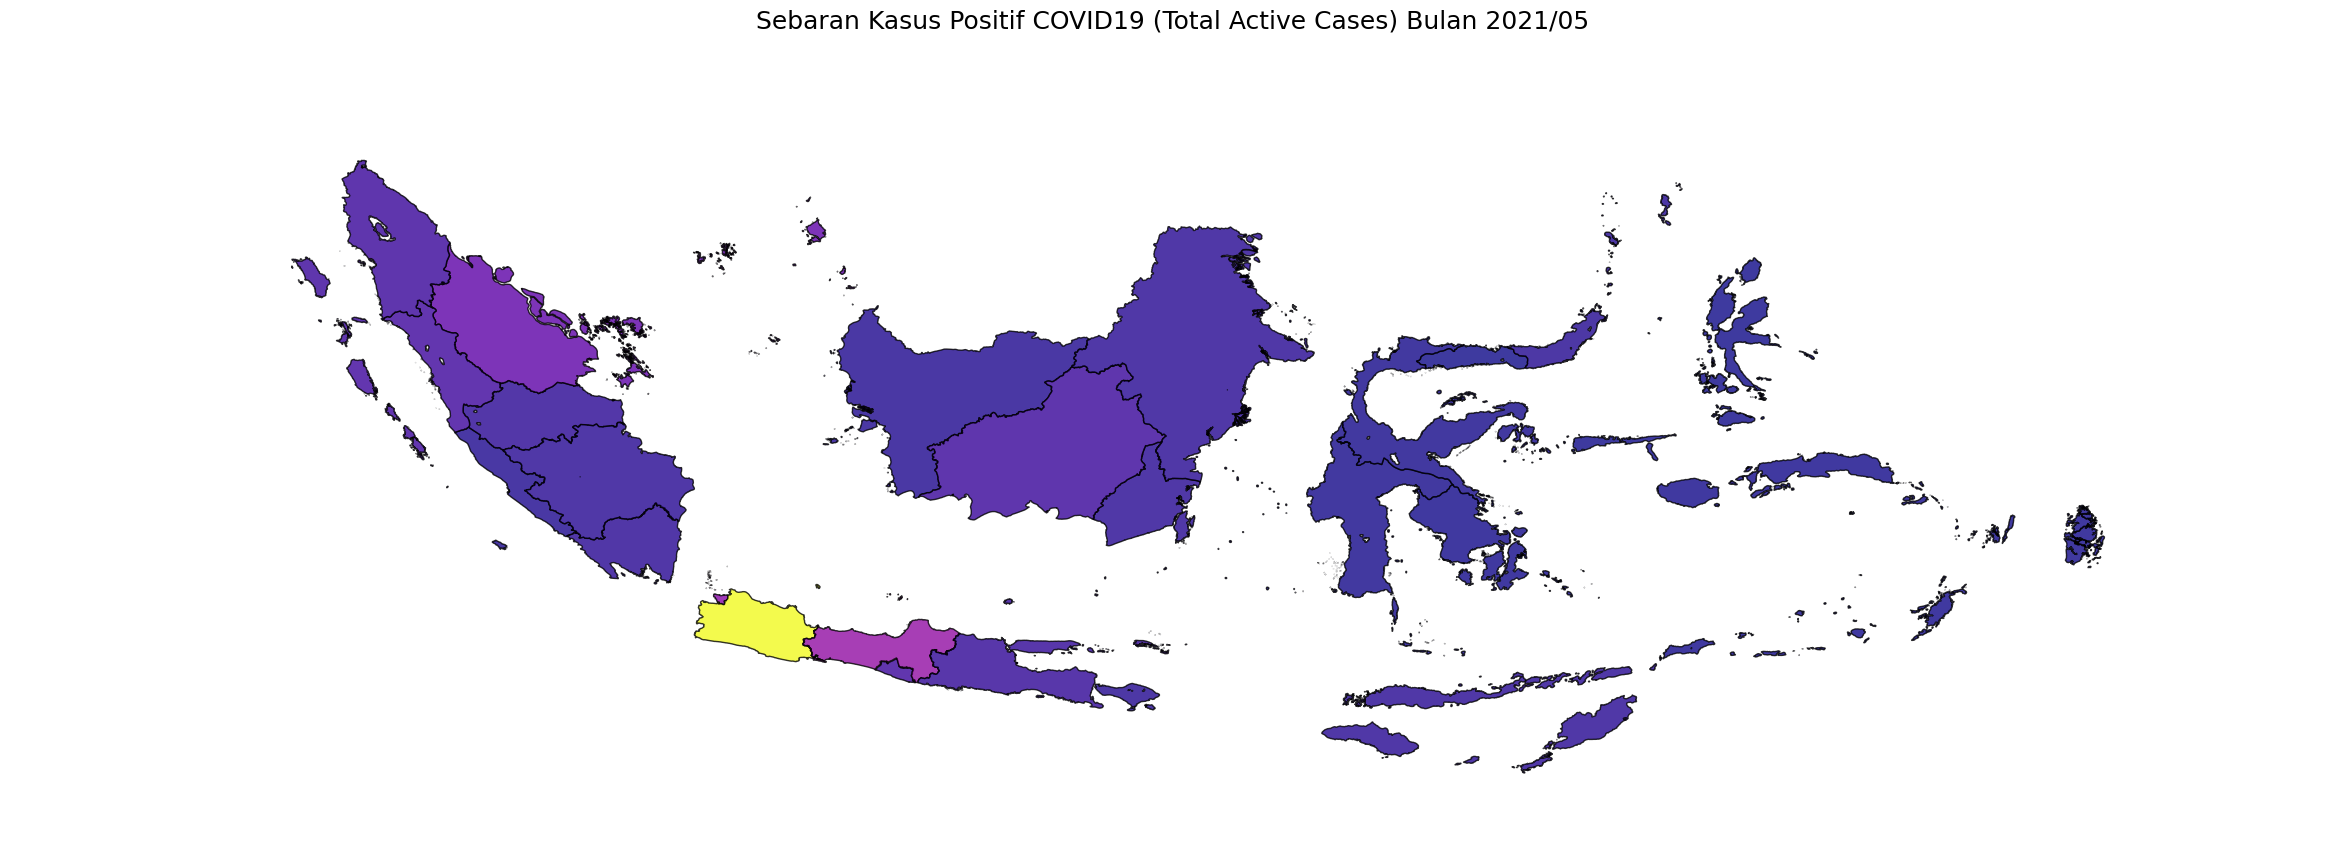

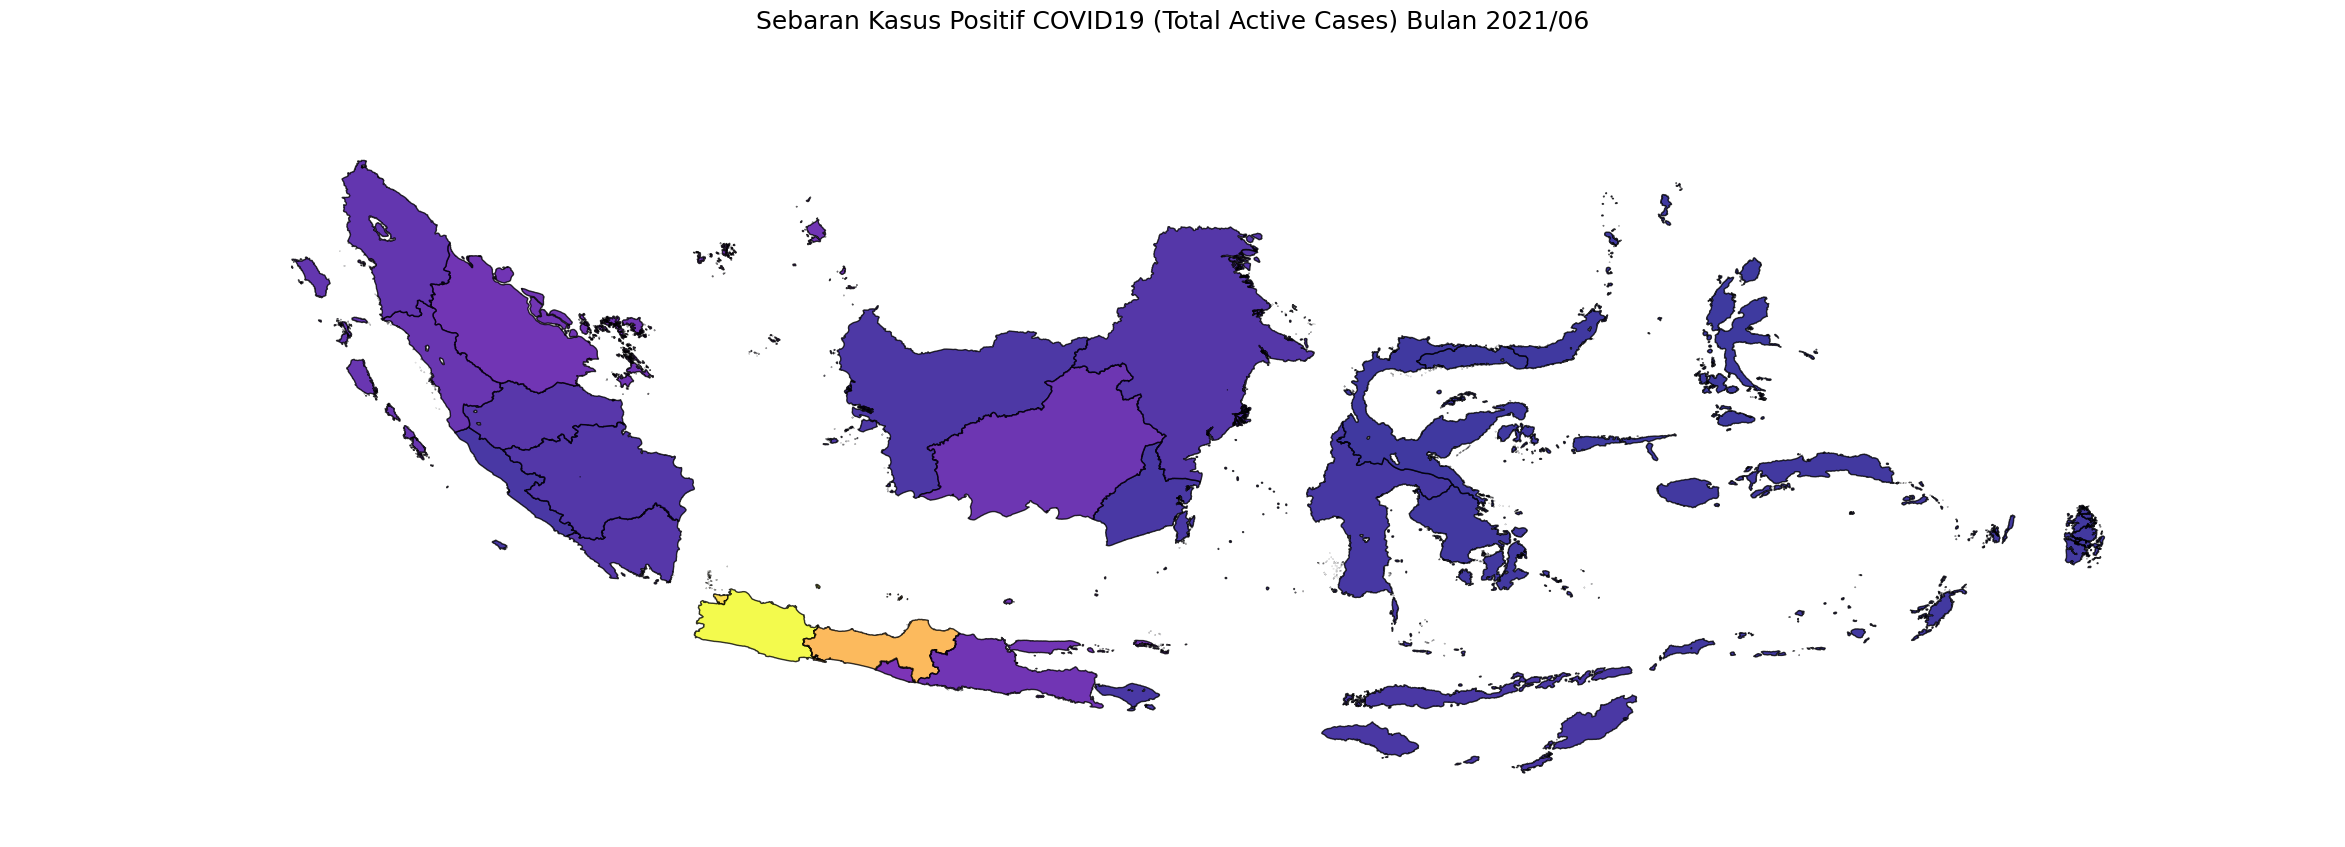

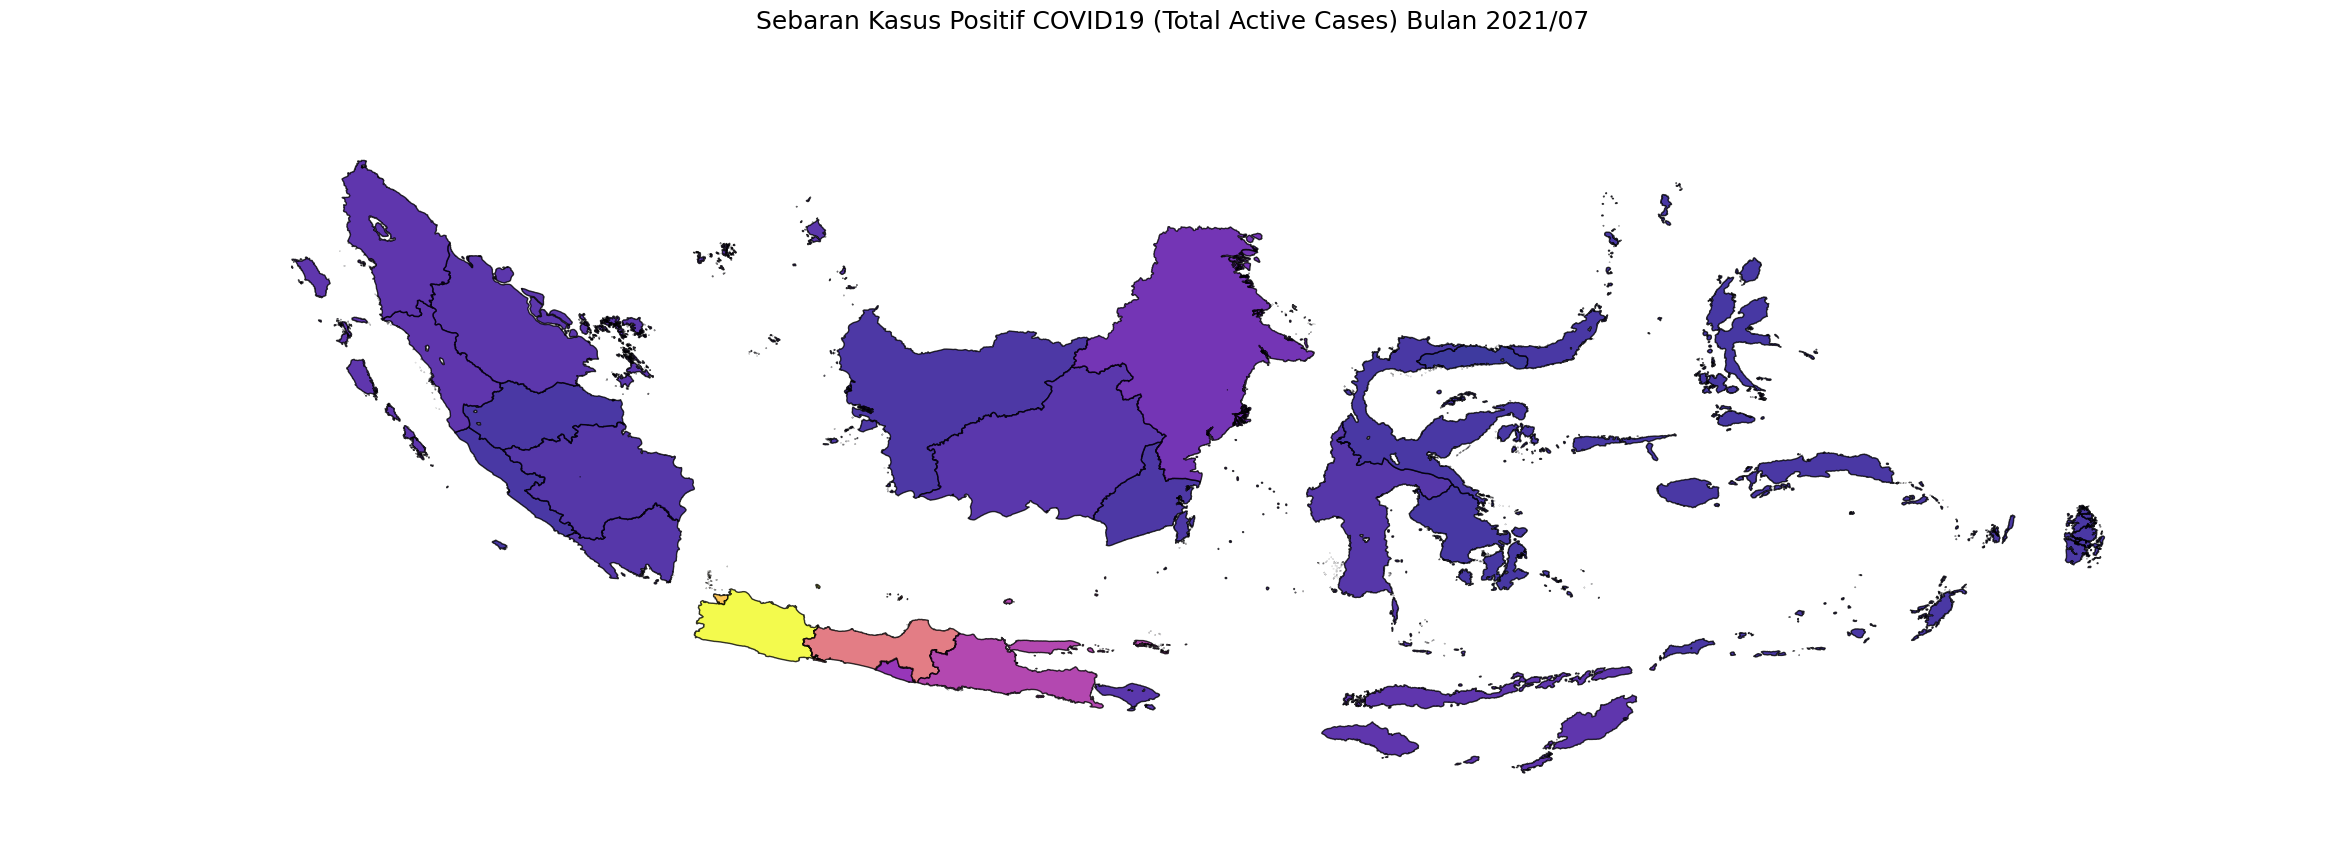

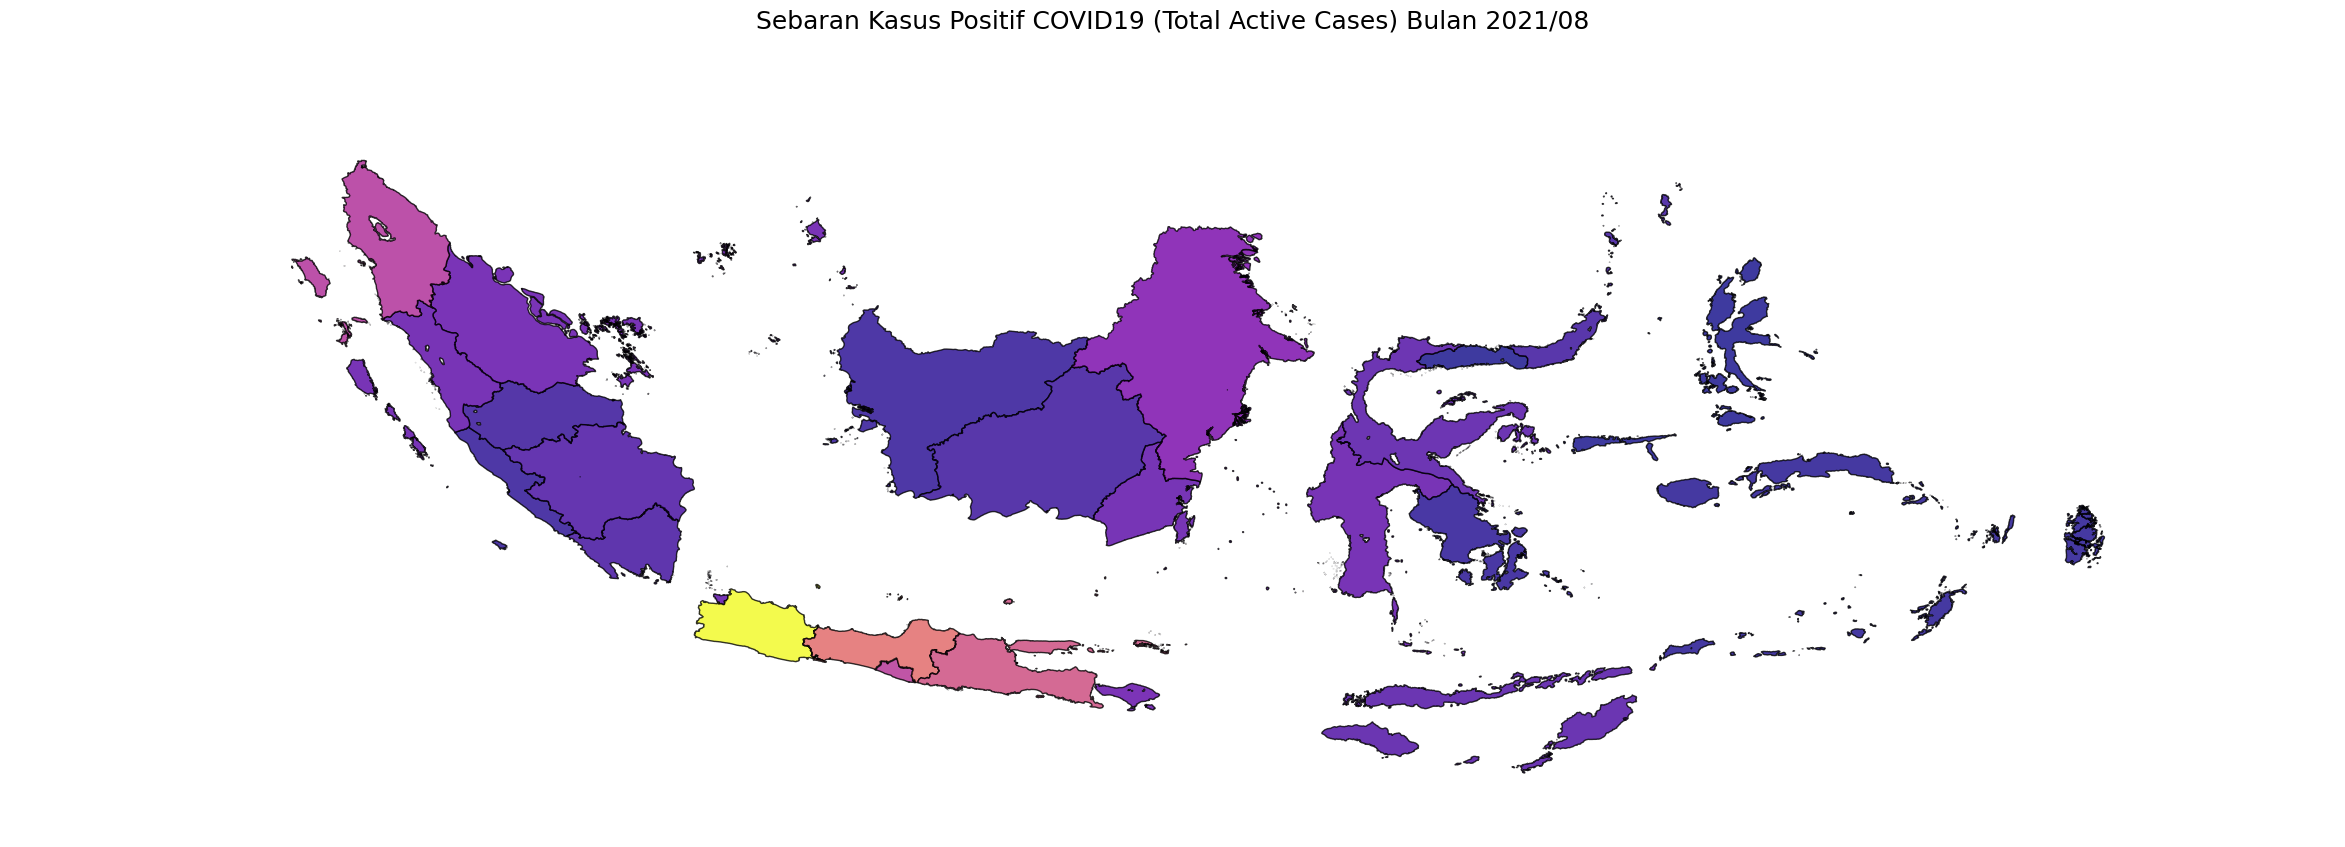

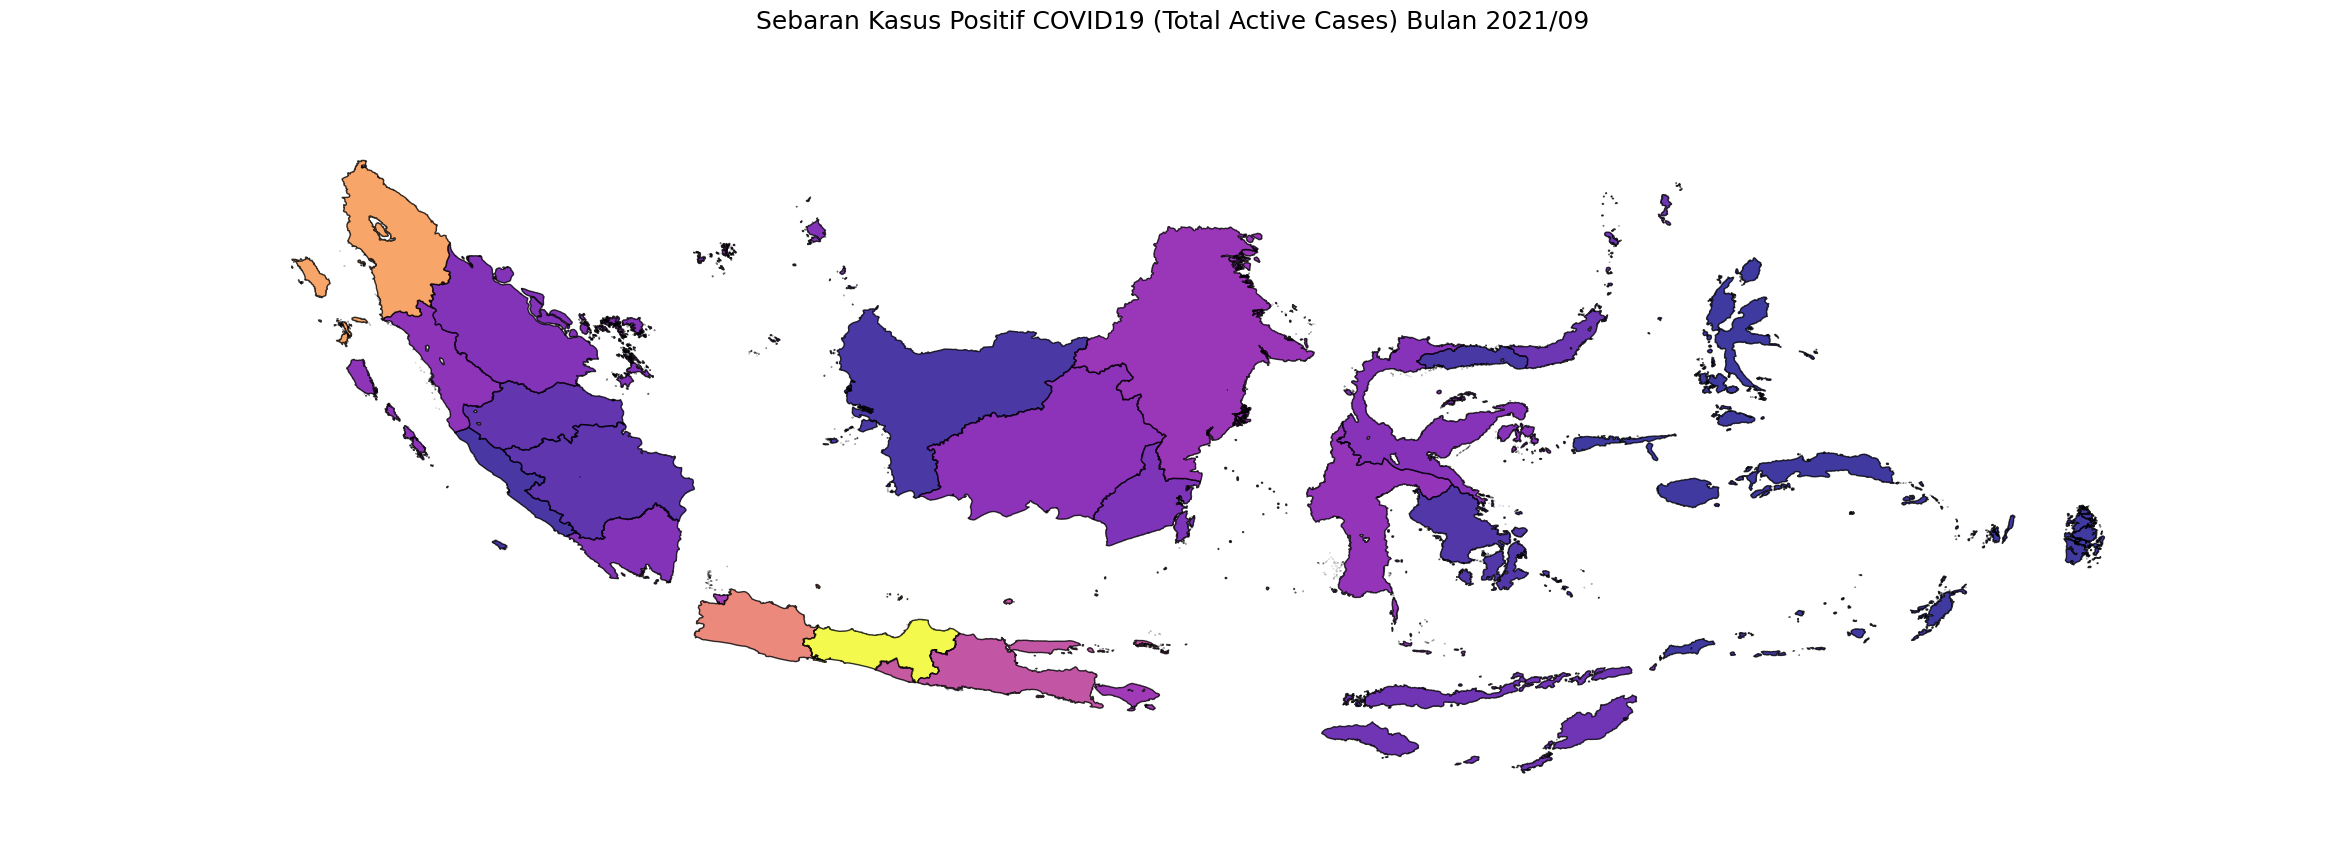

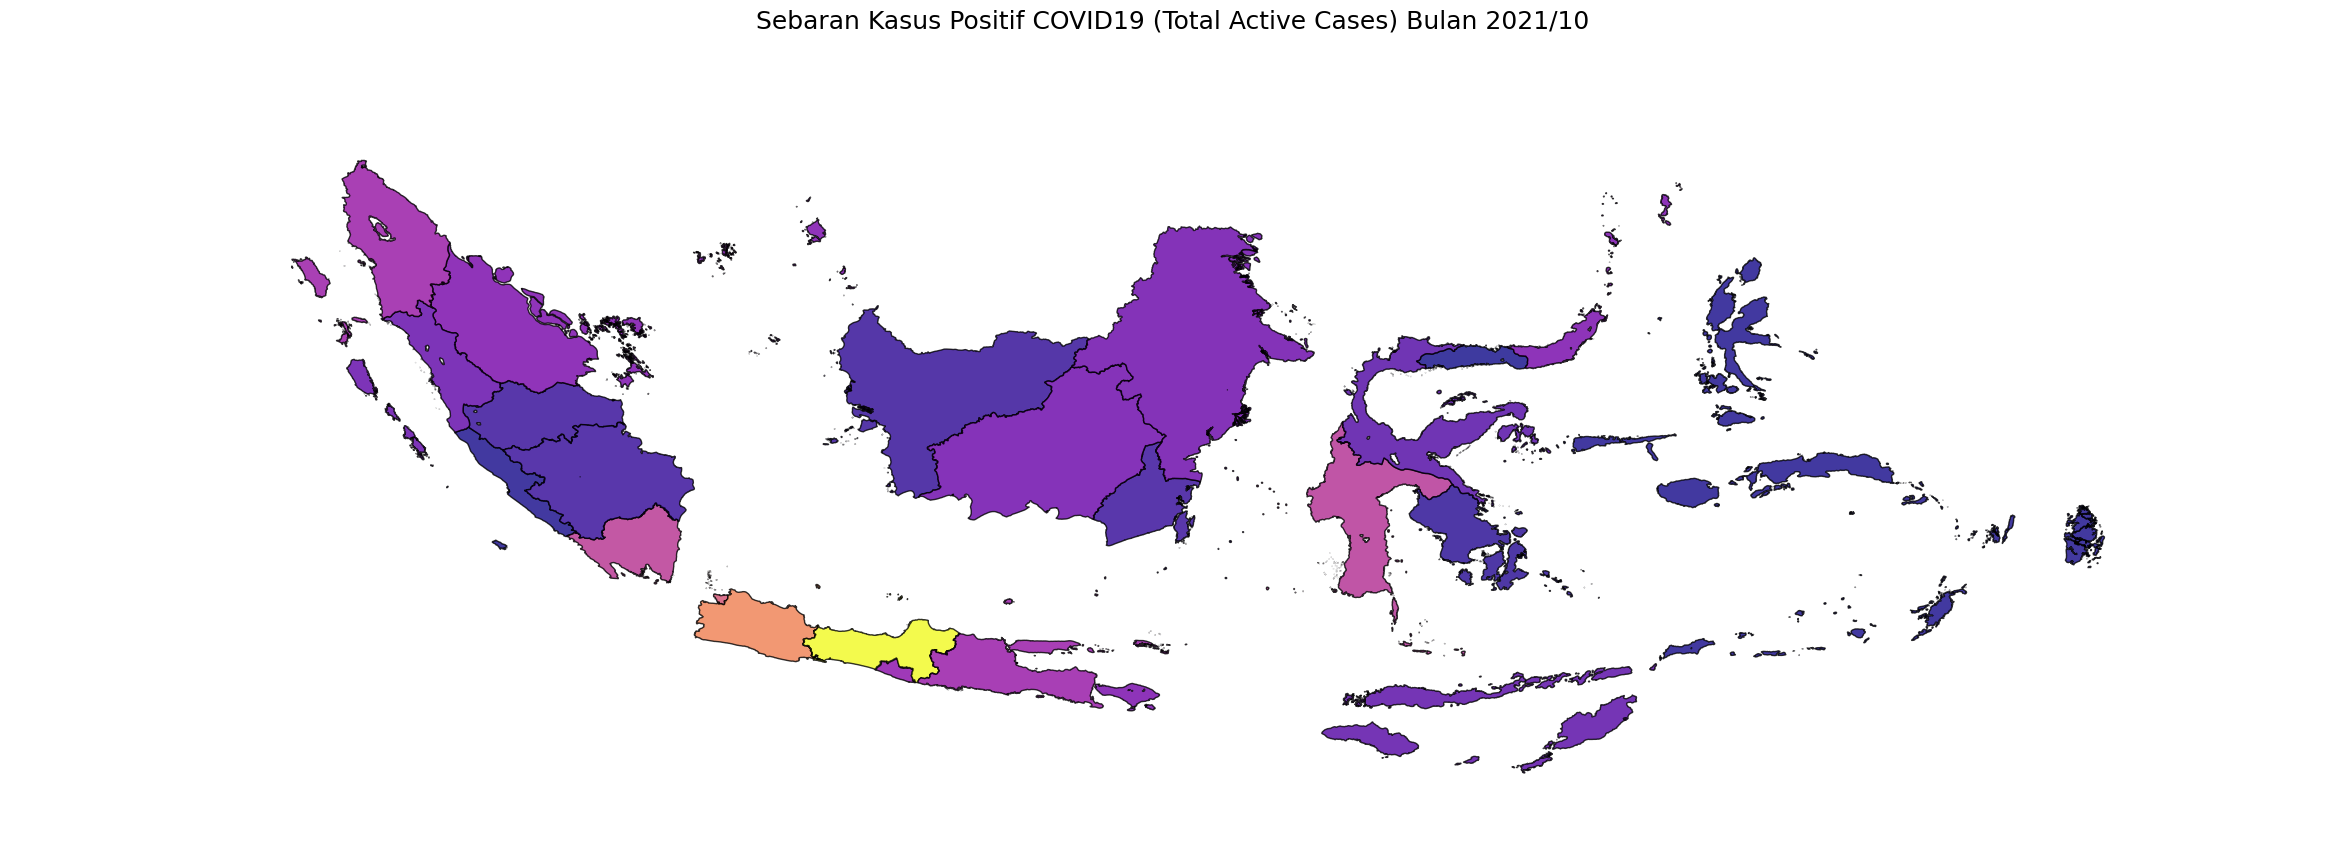

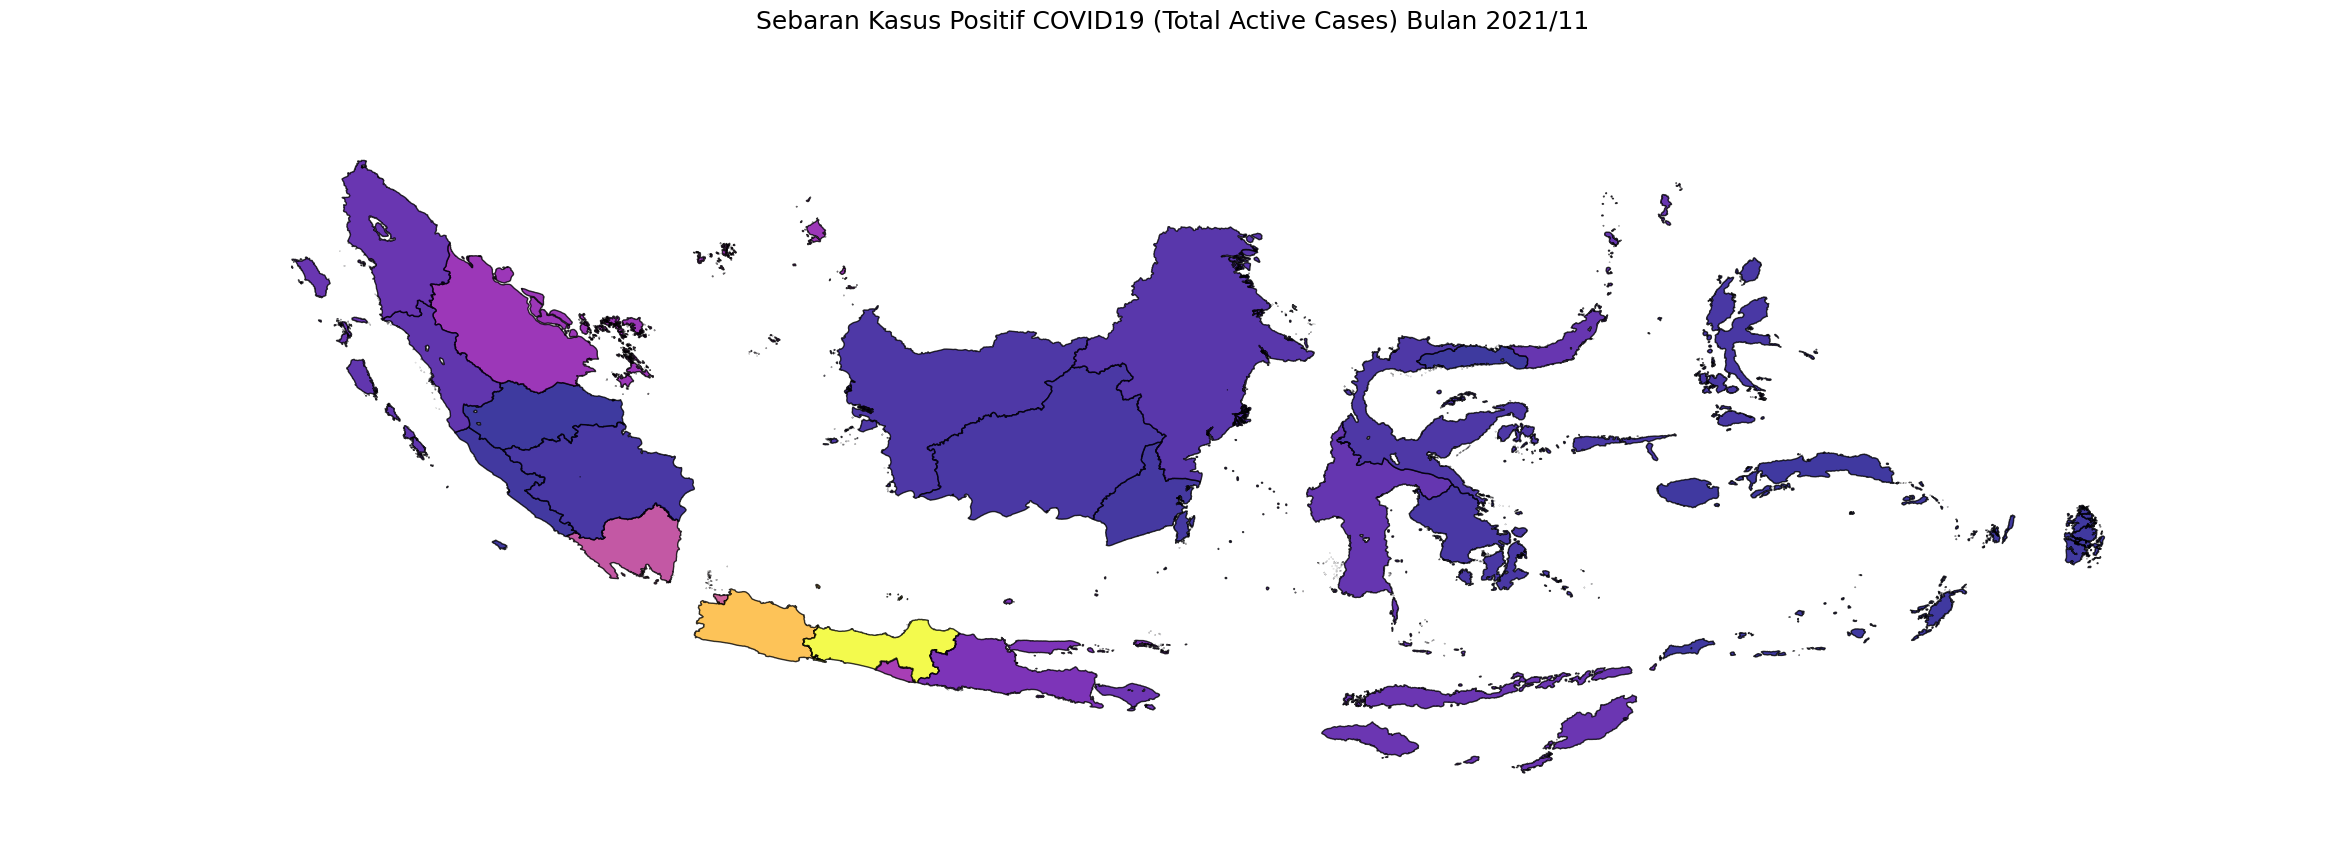

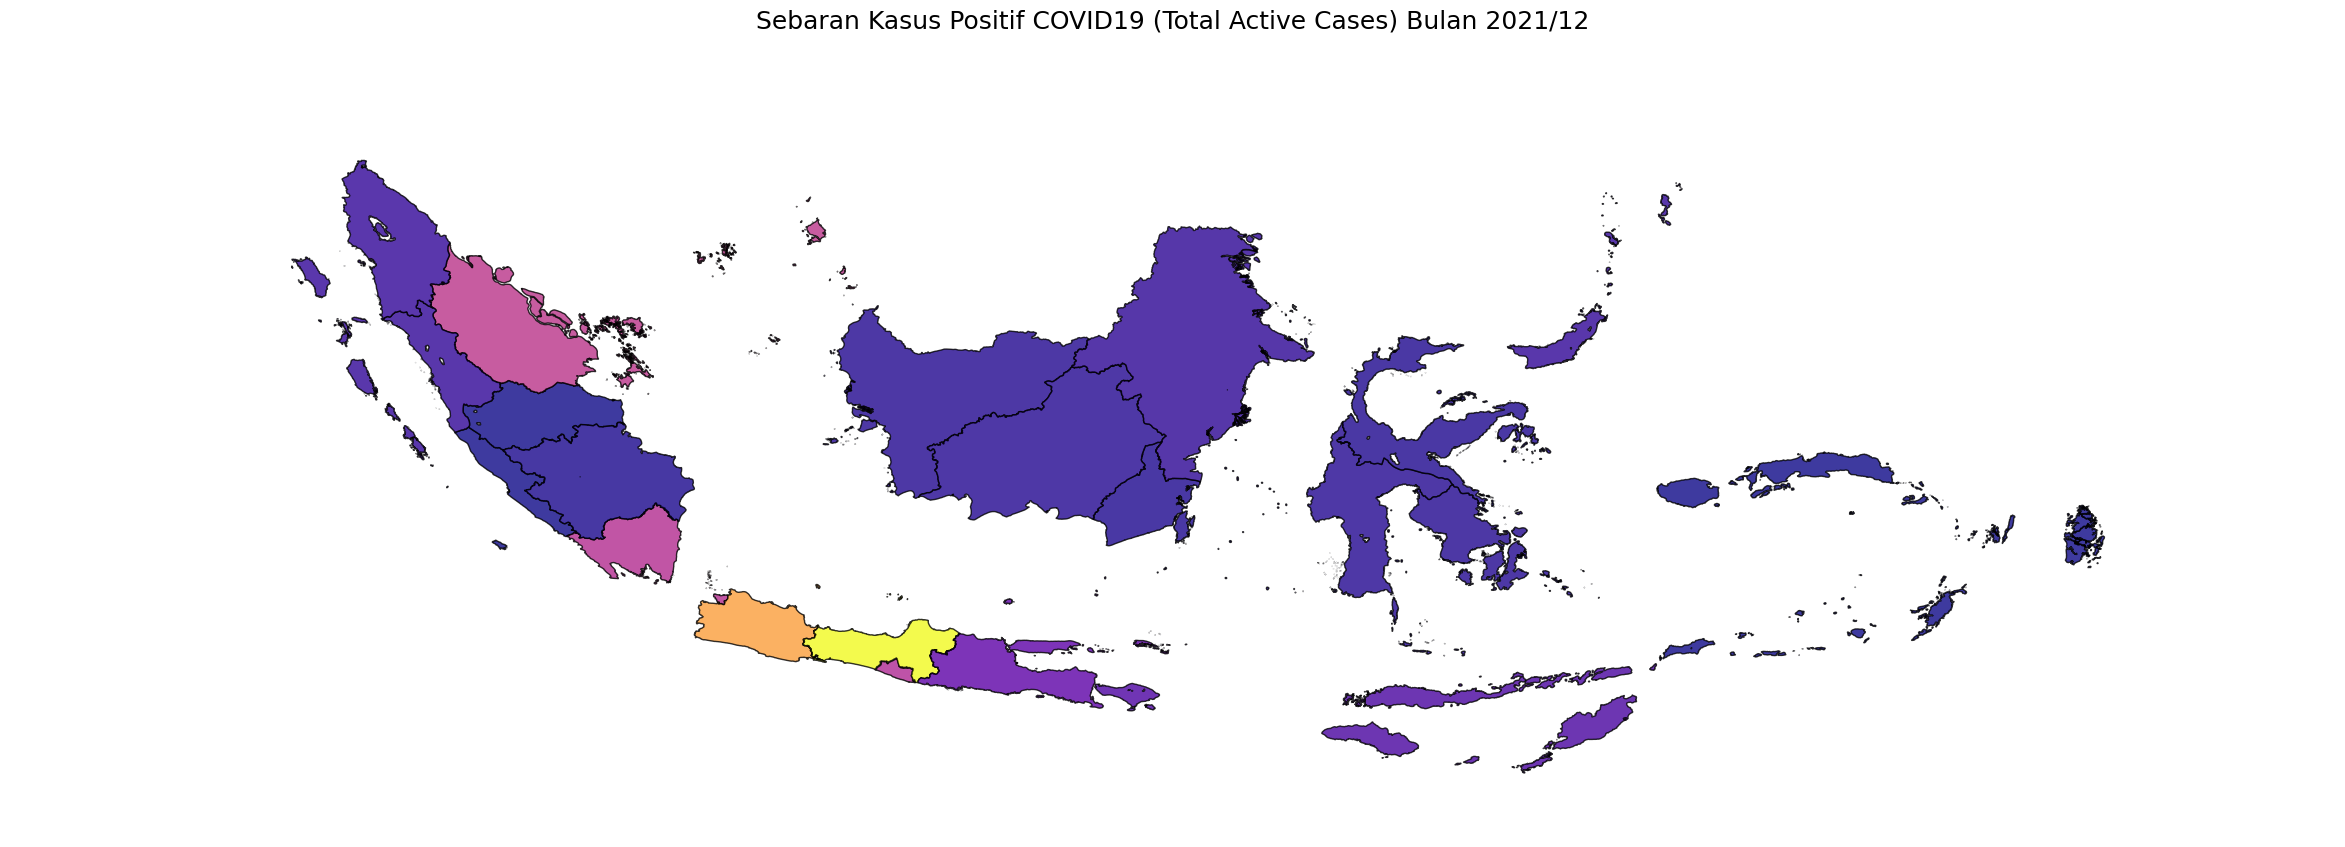

In [88]:
image_files= []
anim_path = pathlib.Path("anim/")
anim_path.mkdir(parents=True, exist_ok=True)
i=0
covid19_ind = GeoDataFrame(covid19_ind)
for date in date_set:
    i+=1
    pandas_temp = covid19_ind[covid19_ind["YearMonth"] == date]
    ax = gplt.choropleth(
    pandas_temp,
    hue= "Total Active Cases",
    edgecolor="black",
    linewidth=1,
    cmap="plasma",
    alpha = 0.8,
    projection=gcrs.AlbersEqualArea(),
    figsize=(30, 30)
    )

    ax.set_title(
    f"Sebaran Kasus Positif COVID19 (Total Active Cases) Bulan {date}",
    fontsize=18
    )
    file_name = str(anim_path / "{}.png".format(i))
    plt.savefig(file_name, bbox_inches="tight", pad_inches=0.1)
    image_files.append(file_name)